# Finding the ground region of the image

In [1]:
%pip install matplotlib
%pip install ultralytics

import cv2
import numpy as np
import matplotlib.pyplot as plt

import sys
%pwd


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


'/Users/amy/code/homeplate/homeplate/python'

In [15]:
def get_resized_image_from_image_index(index=0):
    image_path = f'../images/test{index}.jpg'
    mat_bgr = cv2.imread(image_path)
    print(f"ORIGINAL: Image Width {mat_bgr.shape[1]} Height {mat_bgr.shape[0]}")
    
    scale = 4000 / mat_bgr.shape[1]
    mat_bgr = cv2.resize(mat_bgr, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)

    print(f"RESIZED: Image Width {mat_bgr.shape[1]} Height {mat_bgr.shape[0]}")

    return mat_bgr

def show_bgr_image(im):
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.imshow(im_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

def get_white_balanced_image(image):
    image = image.astype(np.float32)

    b, g, r = cv2.split(image)
    
    max_b, max_g, max_r = np.max(b), np.max(g), np.max(r)
    print(f"Max values - B: {max_b}, G: {max_g}, R: {max_r}")

    b = b * (255.0 / max_b)
    g = g * (255.0 / max_g)
    r = r * (255.0 / max_r)

    balanced_image = cv2.merge([b, g, r])
    balanced_image = np.clip(balanced_image, 0, 255).astype(np.uint8)

    return balanced_image



ORIGINAL: Image Width 1332 Height 996
RESIZED: Image Width 4000 Height 2991
Max values - B: 255.0, G: 255.0, R: 255.0


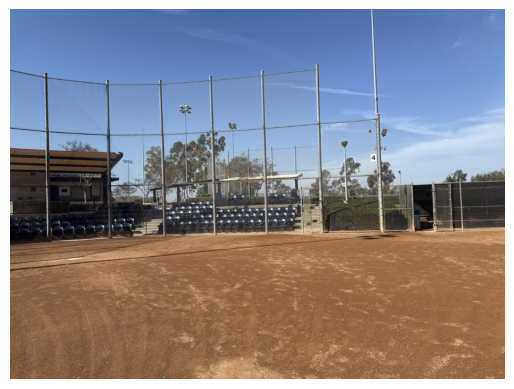

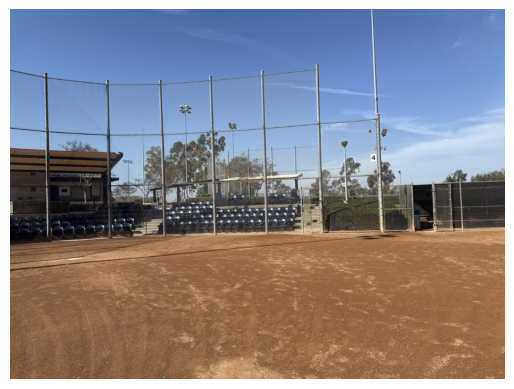

In [53]:
image = get_resized_image_from_image_index(3)
white_balanced = get_white_balanced_image(image)
show_bgr_image(image)
show_bgr_image(white_balanced)

In [63]:
def find_average_hsv_of_ground_region(mat_bgr): 
    hsv_image = cv2.cvtColor(mat_bgr, cv2.COLOR_BGR2HSV)

    height, width, _ = hsv_image.shape 
    # Assuming that the ground is in the lower 1/3 of the image
    roi = hsv_image[int(height / 3):height, 0:width] 
    average_hsv = cv2.mean(roi)  # Returns (B, G, R, A) for BGR, but we want HSV
    print(f'Average HSV: {average_hsv}')
    return average_hsv


In [73]:
def apply_hsv_filter(mat_bgr, lower_bound=np.array([10, 20, 80]), upper_bound=np.array([30, 255, 255])): 
    hsv_frame = cv2.cvtColor(mat_bgr, cv2.COLOR_BGR2HSV)
    # H, S, V 
    # Lower saturation captures more muted colors 
    # Higher values captures brighter shades 
    hsv_frame = cv2.inRange(hsv_frame, lower_bound, upper_bound)
    mat_bgr = cv2.resize(hsv_frame, None, fx=0.5, fy=0.5)

    # mat_bgr = cv2.cvtColor(mat_bgr, cv2.COLOR_HSV2BGR)
    return mat_bgr


ORIGINAL: Image Width 2042 Height 1038
RESIZED: Image Width 4000 Height 2033
Max values - B: 255.0, G: 255.0, R: 255.0


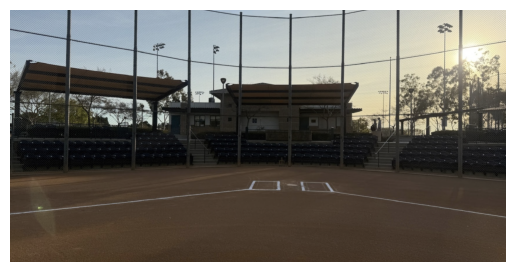

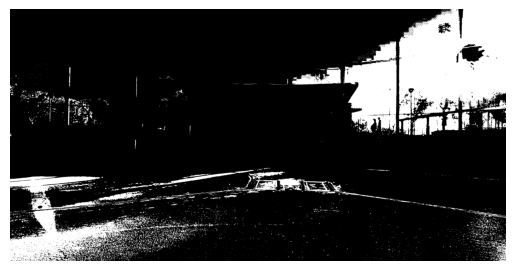

In [70]:
image = get_resized_image_from_image_index(9)
image = get_white_balanced_image(image)
hsv_image = apply_hsv_filter(image)
show_bgr_image(image)
show_bgr_image(hsv_image)

## What are the average HSV values of the lower 1/3 of the test images? 

Lower bound: [21.793915167095115, 73.66241408554572, 64.14014624608969]

Upper bound:[58.07673516666667, 118.70764090616967, 164.34747433333334]

Mean:[43.43410626770109, 87.66084718989772, 117.89020979206929]

My lower & upper bounds:
[10, 20, 80]
[30, 255, 255]

In [71]:
# Finding the average HSV values for the test images 
# mean_avg_HSV = (-1,-1,-1)
sum_HSV = [0,0,0]
lower_bound_HSV = [999,999,999]
upper_bound_HSV = [-1,-1,-1]

total_images = 11
for i in range(total_images):
    image = get_resized_image_from_image_index(i)
    h,s,v,_ = find_average_hsv_of_ground_region(image)
    # sum_HSV = sum_HSV[0] + h, sum_HSV[1] + s, sum_HSV[2] + v
    sum_HSV[0] += h
    sum_HSV[1] += s
    sum_HSV[2] += v

    lower_bound_HSV[0] = min(lower_bound_HSV[0], h)
    lower_bound_HSV[1] = min(lower_bound_HSV[1], s)
    lower_bound_HSV[2] = min(lower_bound_HSV[2], v)

    upper_bound_HSV[0] = max(upper_bound_HSV[0], h)
    upper_bound_HSV[1] = max(upper_bound_HSV[1], s)
    upper_bound_HSV[2] = max(upper_bound_HSV[2], v)




ORIGINAL: Image Width 4000 Height 2252
RESIZED: Image Width 4000 Height 2252
Average HSV: (45.33699067909454, 84.09265396138483, 105.10213315579227, 0.0)
ORIGINAL: Image Width 900 Height 600
RESIZED: Image Width 4000 Height 2667
Average HSV: (41.43930793025872, 97.06145050618673, 110.42428430821148, 0.0)
ORIGINAL: Image Width 1244 Height 1098
RESIZED: Image Width 4000 Height 3531
Average HSV: (46.1096049277825, 77.38132901444351, 106.20987935429058, 0.0)
ORIGINAL: Image Width 1332 Height 996
RESIZED: Image Width 4000 Height 2991
Average HSV: (36.791450852557674, 99.88974899699097, 141.92262562688066, 0.0)
ORIGINAL: Image Width 1776 Height 986
RESIZED: Image Width 4000 Height 2221
Average HSV: (56.03792015530047, 84.72692910195813, 136.36640124915596, 0.0)
ORIGINAL: Image Width 1876 Height 978
RESIZED: Image Width 4000 Height 2085
Average HSV: (56.504804676259, 85.83727949640289, 138.01899856115108, 0.0)
ORIGINAL: Image Width 1280 Height 720
RESIZED: Image Width 4000 Height 2250
Average

In [72]:
print(f'Lower bound: {lower_bound_HSV}\nUpper bound:{upper_bound_HSV}\nMean:{[x / 11 for x in sum_HSV]}')


Lower bound: [21.793915167095115, 73.66241408554572, 64.14014624608969]
Upper bound:[58.07673516666667, 118.70764090616967, 164.34747433333334]
Mean:[43.43410626770109, 87.66084718989772, 117.89020979206929]


Now, using the new HSV values

ORIGINAL: Image Width 4000 Height 2252
RESIZED: Image Width 4000 Height 2252
Max values - B: 255.0, G: 255.0, R: 255.0


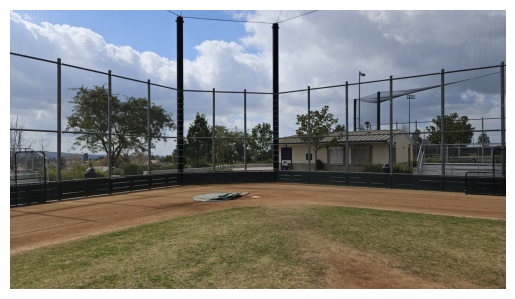

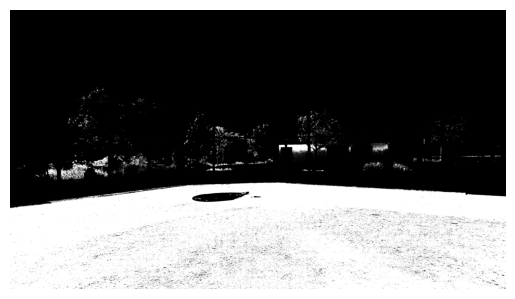

ORIGINAL: Image Width 900 Height 600
RESIZED: Image Width 4000 Height 2667
Max values - B: 255.0, G: 255.0, R: 255.0


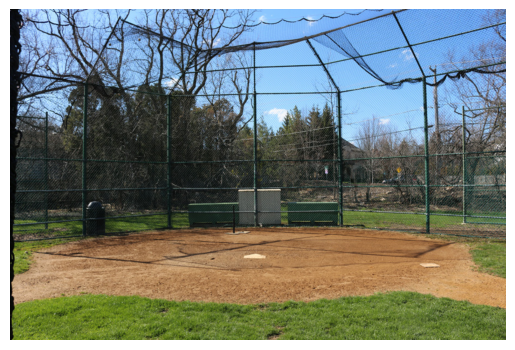

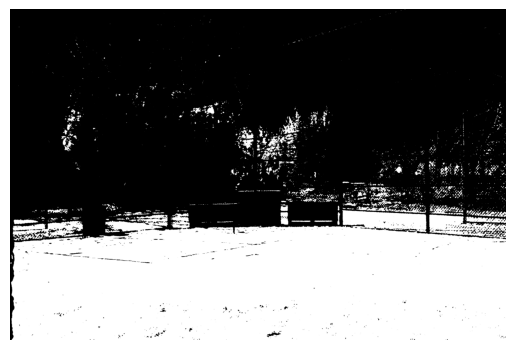

ORIGINAL: Image Width 1244 Height 1098
RESIZED: Image Width 4000 Height 3531
Max values - B: 254.0, G: 255.0, R: 255.0


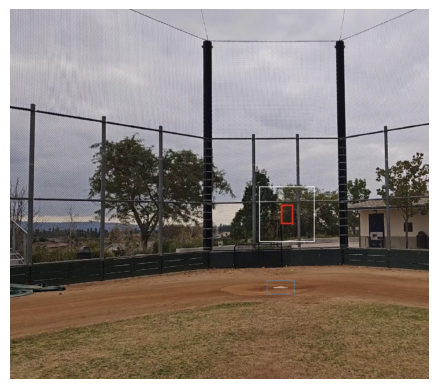

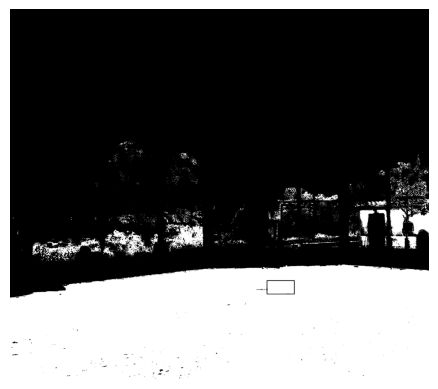

ORIGINAL: Image Width 1332 Height 996
RESIZED: Image Width 4000 Height 2991
Max values - B: 255.0, G: 255.0, R: 255.0


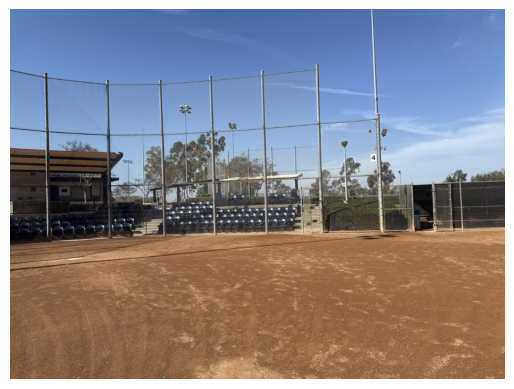

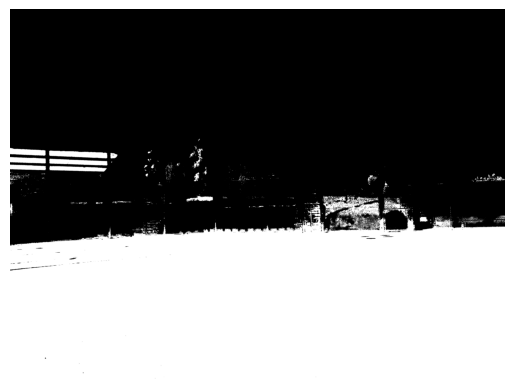

ORIGINAL: Image Width 1776 Height 986
RESIZED: Image Width 4000 Height 2221
Max values - B: 255.0, G: 254.0, R: 255.0


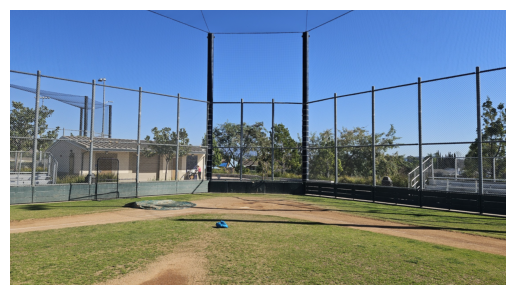

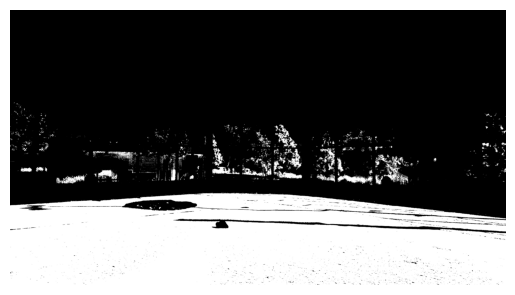

ORIGINAL: Image Width 1876 Height 978
RESIZED: Image Width 4000 Height 2085
Max values - B: 253.0, G: 254.0, R: 254.0


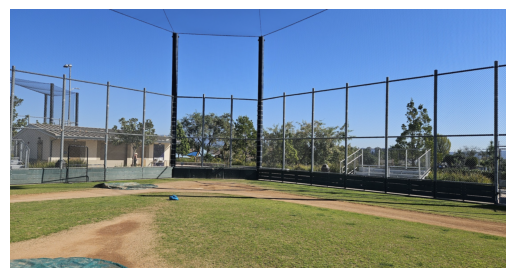

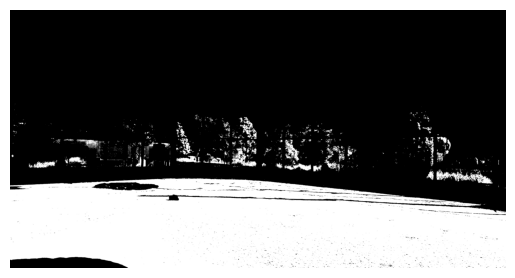

ORIGINAL: Image Width 1280 Height 720
RESIZED: Image Width 4000 Height 2250
Max values - B: 255.0, G: 255.0, R: 255.0


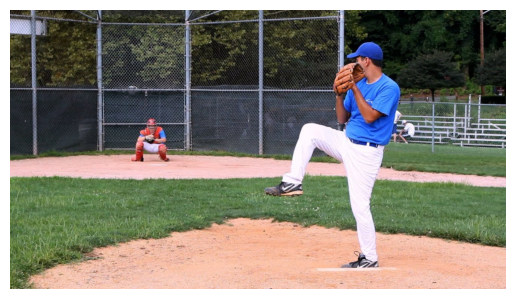

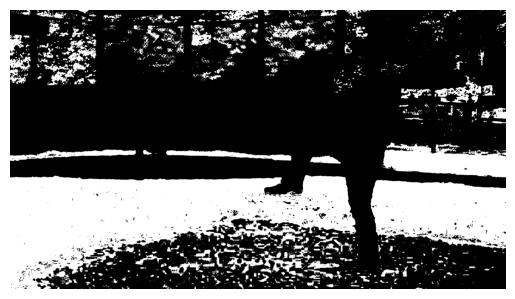

ORIGINAL: Image Width 1626 Height 910
RESIZED: Image Width 4000 Height 2239
Max values - B: 255.0, G: 244.0, R: 246.0


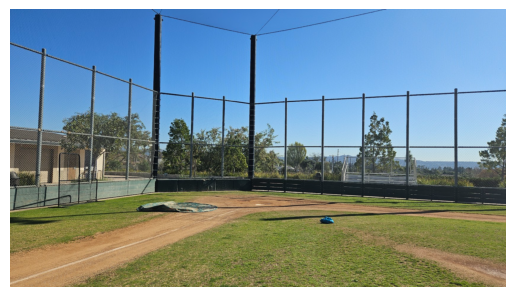

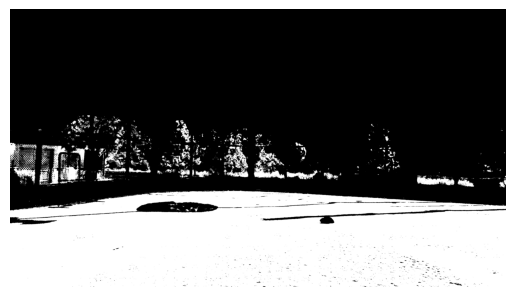

ORIGINAL: Image Width 1766 Height 1030
RESIZED: Image Width 4000 Height 2333
Max values - B: 251.0, G: 255.0, R: 255.0


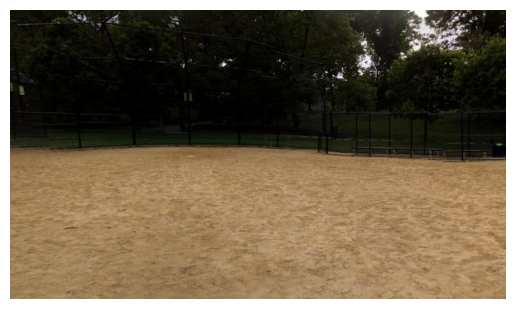

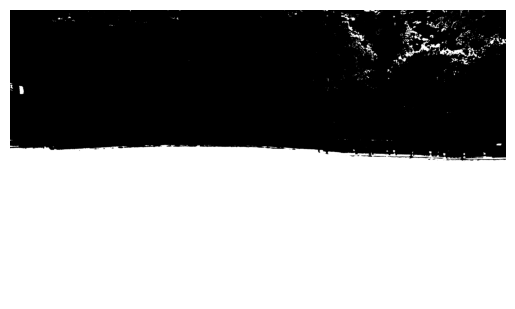

ORIGINAL: Image Width 2042 Height 1038
RESIZED: Image Width 4000 Height 2033
Max values - B: 255.0, G: 255.0, R: 255.0


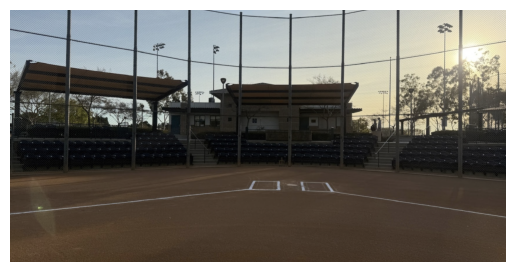

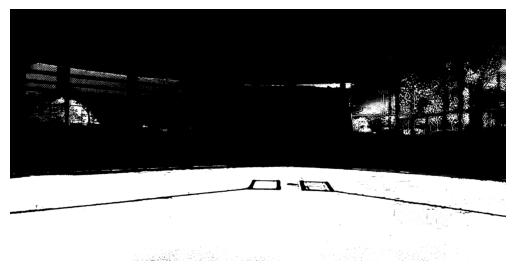

ORIGINAL: Image Width 1402 Height 1008
RESIZED: Image Width 4000 Height 2876
Max values - B: 242.0, G: 250.0, R: 252.0


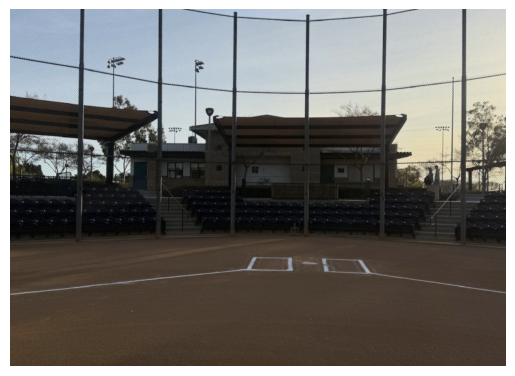

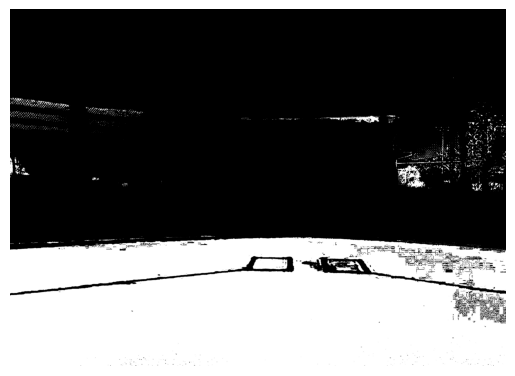

In [76]:
for i in range(total_images): 
    image = get_resized_image_from_image_index(i)
    image = get_white_balanced_image(image)
    hsv_image = apply_hsv_filter(image, lower_bound=np.array([10,60,60]), upper_bound=np.array([60,255,255]))
    show_bgr_image(image)
    show_bgr_image(hsv_image)
    cv2.imwrite(f'../images/ground_HSV_masks/before_smoothing/image{i}.jpg', hsv_image)


Now that I can generally find out where ground is, I'll use mophological opening (to remove noise) and closing to fill in the gaps and connected component analysis to group the foreground and background in separate groups.

Then I take the largest group, and apply closing on that again to remove any objects in the foreground.

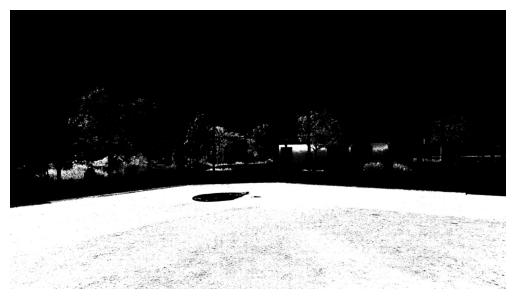

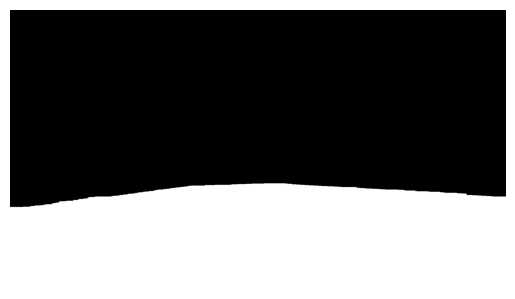

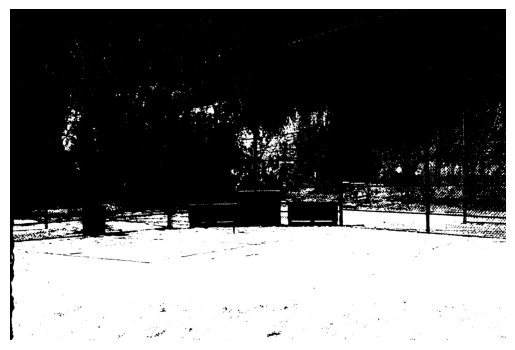

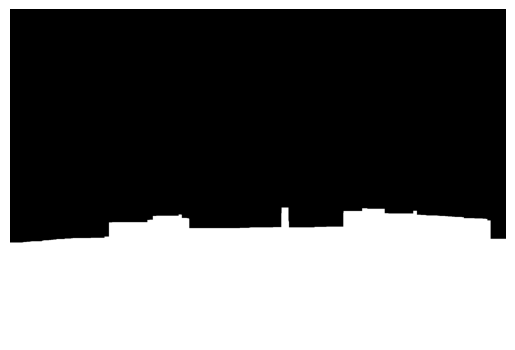

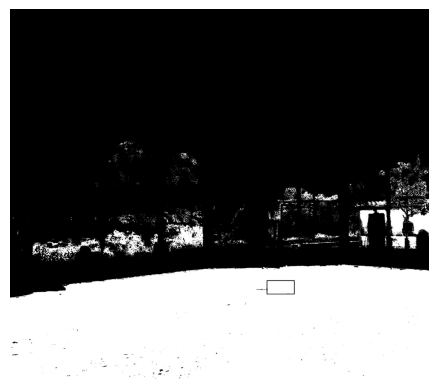

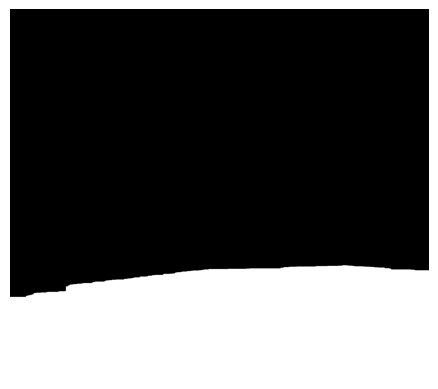

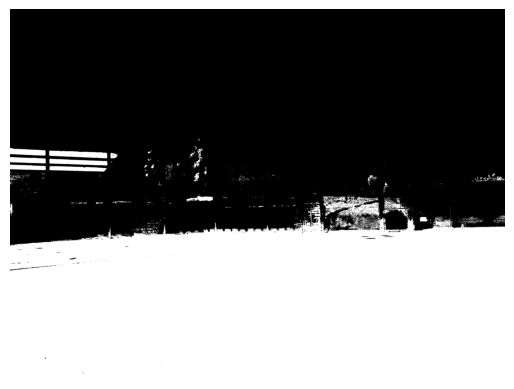

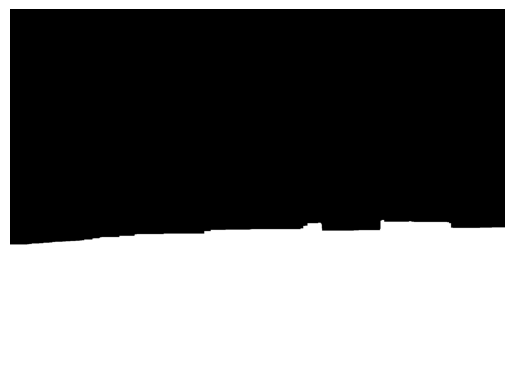

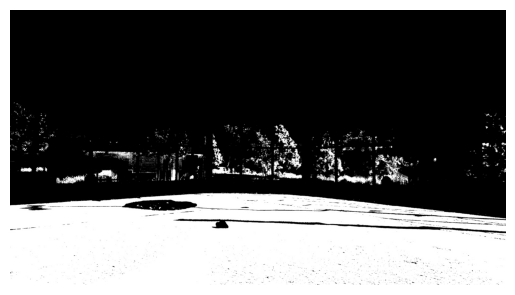

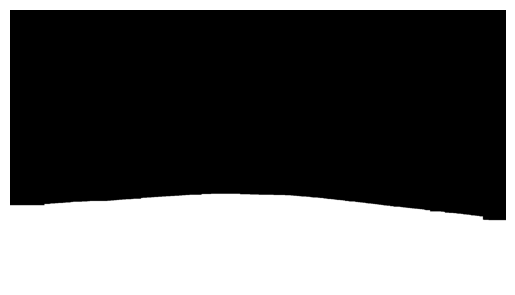

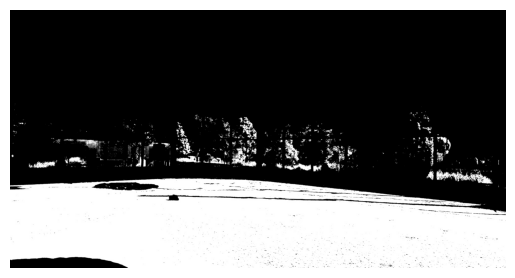

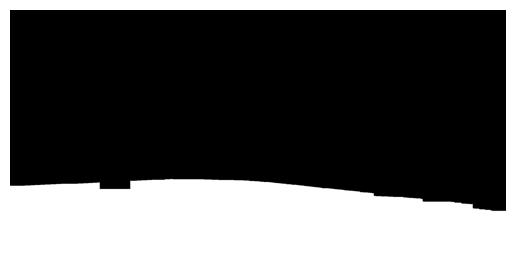

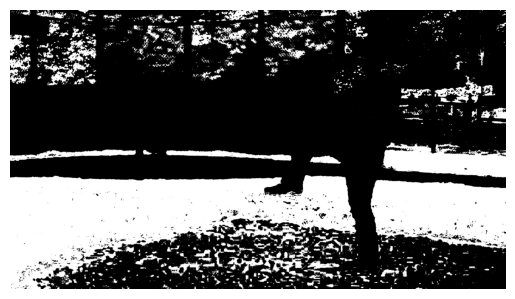

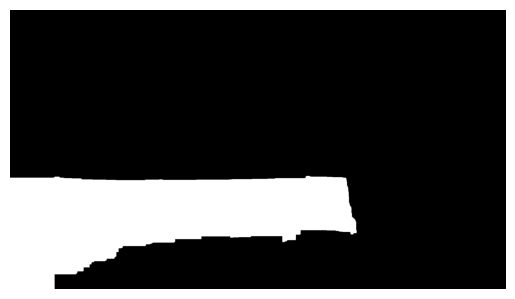

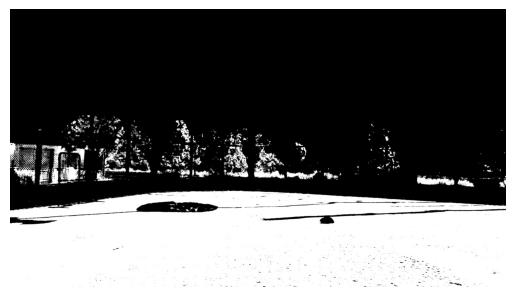

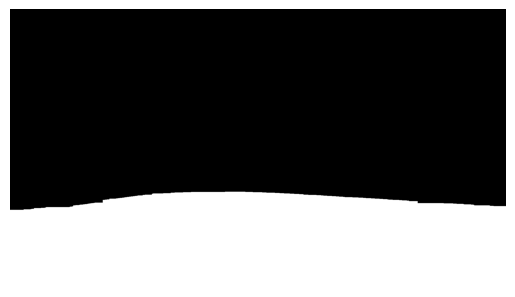

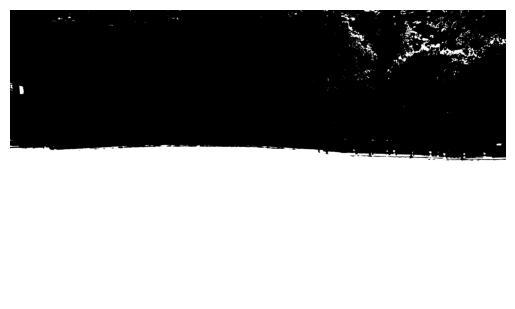

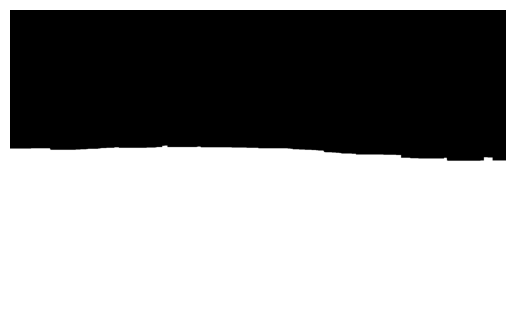

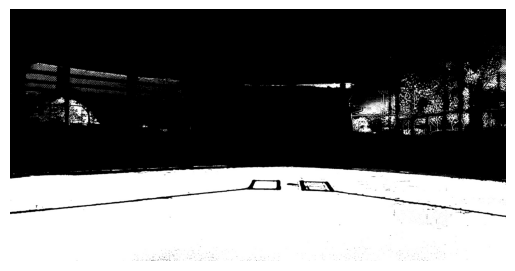

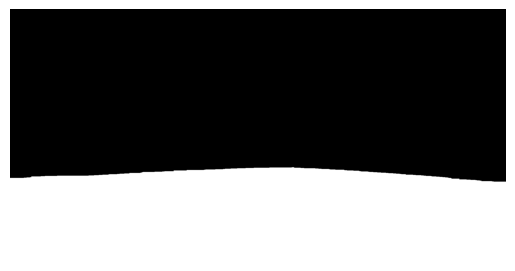

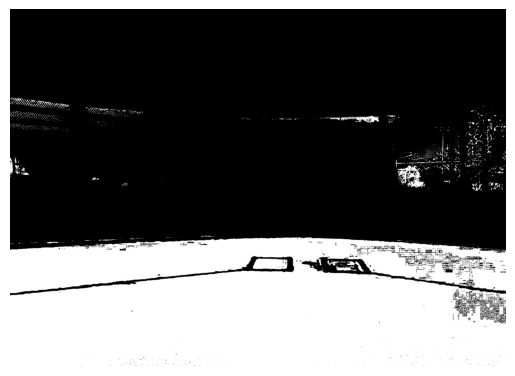

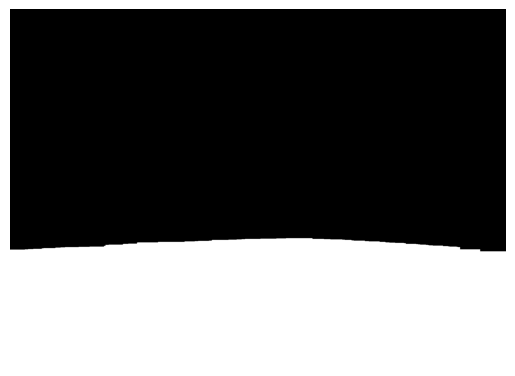

In [ ]:
for index in range(total_images):
    binary_image = cv2.imread(f'../images/ground_HSV_masks/before_smoothing/image{index}.jpg', cv2.IMREAD_GRAYSCALE)

    kernel = np.ones((25, 25), np.uint8) 


    # Perform morphological closing to fill gaps
    kernel = np.ones((10, 10), np.uint8)  # Adjust kernel size as needed
    opened = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)


    # Perform connected component analysis to identify the two largest regions
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(closed, connectivity=8)

    # Identify the two largest components (excluding the background)
    sorted_indices = np.argsort(stats[:, cv2.CC_STAT_AREA])[::-1]  # Sort by area
    largest_labels = sorted_indices[1:3]  # The two largest foreground components

    # Create a mask with only the two largest connected components
    filtered_mask = np.zeros_like(binary_image)
    for label in largest_labels:
        filtered_mask[labels == label] = 255
    largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])  # Excluding background label (0)
    largest_component_mask = np.where(labels == largest_label, 255, 0).astype(np.uint8)


    kernel = np.ones((100, 100), np.uint8)
    filled_mask = cv2.morphologyEx(largest_component_mask, cv2.MORPH_CLOSE, kernel)

        
    show_bgr_image(binary_image)
    # show_bgr_image(closed)
    # show_bgr_image(filtered_mask)
    # show_bgr_image(largest_component_mask)
    show_bgr_image(filled_mask)
    # show_bgr_image(closed_image)


In [122]:
# # Load the image
# binary_image = cv2.imread('../images/ground_HSV_masks/before_smoothing/image0.jpg', cv2.IMREAD_GRAYSCALE)
# kernel = (5,5)
# # Apply Gaussian Blur
# gaussian_blurred = cv2.GaussianBlur(binary_image, kernel, 5)

# # Apply Median Blur
# median_blurred = cv2.medianBlur(binary_image, 5)

# # Apply Average Blur
# average_blurred = cv2.blur(binary_image, (15, 15))

# # Apply Bilateral Filter
# bilateral_blurred = cv2.bilateralFilter(binary_image, 9, 75, 75)

# show_bgr_image(gaussian_blurred)
# show_bgr_image(median_blurred)
# show_bgr_image(average_blurred)
# show_bgr_image(bilateral_blurred)
